## Problem Statement:

The predicting of fare amount (inclusive of tolls) for a taxi ride, given the pickup and dropoff locations,the pickup date time and many other attributes given below. 

#### Target Variable: 
fare_amount

#### Type of Problem:  
Regression

#### Description of Variables:

    TID: 	Unique ID
    Vendor_ID:	Technology service vendor associated with cab company
    New_User:	If a new user is taking the ride
    toll_price:	toll tax amount
    tip_amount:	tip given to driver (if any)
    tax:	applicable tax
    pickup_timestamp:	time at which the ride started
    dropoff_timestamp:	time at which ride ended
    passenger_count:	number of passenger during the ride
    pickup_longitude:	pickup location longitude data
    pickup_latitude:	pickup location latitude data
    rate_category:	category assigned to different rates at which a customer is charged
    store_and_fwd:	if driver stored the data offline and later forwarded
    dropoff_longitude:	drop off longitude data
    dropoff_latitude:	drop off latitude data
    payment_type:	payment mode used by the customer (CRD = Credit Card, CSH - Cash, DIS - dispute, NOC - No Charge, UNK - Unknown)
    surcharge:	surchage applicable on the trip
    fare_amount:	trip fare (to be predicted)


## Hypothesis
    1. Taxi Fare increases with increase of distance traveled.
    2. Taxi Fare increases with increase of travel time.
    3. Taxi Fare increases during the peak hours of a day.


In [1]:
#Import Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
#function for missing values in columns
def missing_coldata(df):
    missin_col = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100,1), 
                              columns=['% of missing value'])
    missin_col['Count of Missing Values'] = df.isnull().sum()
    return missin_col


In [3]:
# Import data file:

taxi = pd.read_csv("C:/Users/SYS/cute 3/20190915_Batch67_CSE7305c_ProblemArchitecting/train.csv")
taxi.head()


,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,AIX000688685,DST000532,NO,5.33,NaN,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,40.770710,1,NaN,-73.985572,40.776607,CSH,0.5,38.33
1,AIX000411386,DST000532,NO,0.00,1.9,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,40.735312,1,NaN,-74.002815,40.748917,CRD,0.0,11.90
2,AIX0001135810,DST000401,NO,0.00,3.0,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,40.789180,1,N,-73.978704,40.748040,CRD,0.0,18.00
3,AIX0001005019,DST000401,NO,0.00,NaN,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,40.755829,1,N,-73.977303,40.758622,CSH,0.0,5.00
4,AIX000393080,DST000532,NO,0.00,0.0,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,40.724800,1,NaN,-73.958580,40.708610,CRD,0.5,13.50


In [4]:
#Shape of the data
taxi.shape


(87958, 18)

In [5]:
# Information of variables:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Unique Data":data.apply(lambda x: x.nunique(),axis=0), 
                         "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(taxi)



,Data Type,No of Unique Data,Levels
TID,object,87958,['AIX000688685' 'AIX000411386' 'AIX0001135810'...
vendor_id,object,4,['DST000532' 'DST000401' 'DST000543' 'DST000481']
new_user,object,2,['NO' 'YES' nan]
tolls_amount,float64,69,[5.33 0.0 10.66 11.75 17.05 11.0 7.5 15.5 19.0...
tip_amount,float64,909,[nan 1.9 3.0 0.0 3.15 2.1 4.7 2.15 2.0 0.88 1....
mta_tax,float64,3,[0.5 0.0 -0.5]
pickup_datetime,object,84892,['2015-06-26 21:26:00' '2015-04-09 13:24:00' '...
dropoff_datetime,object,84872,['2015-06-26 21:52:00' '2015-04-09 13:36:00' '...
passenger_count,int64,7,[3 1 2 5 4 6 0]
pickup_longitude,float64,45143,[-73.86599 -73.99175699999998 -73.948541 ... -...


All features show some variance in data, hence none of them can be dropped at this stage.

In [6]:
taxi.describe()

,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,surcharge,fare_amount
count,87958.000000,79150.000000,87958.000000,87958.000000,85346.000000,86168.000000,87958.000000,87679.000000,87544.000000,82693.000000,87958.000000
mean,0.271402,1.532579,0.497948,1.734908,-72.588214,39.991795,1.035312,-72.599128,39.995261,0.318153,15.225970
std,1.276428,2.369551,0.032496,1.401843,10.033457,5.509783,0.279604,9.992113,5.498756,0.361798,12.803014
min,0.000000,0.000000,-0.500000,0.000000,-81.169787,0.000000,0.000000,-74.436935,0.000000,-0.500000,0.000000
25%,0.000000,0.000000,0.500000,1.000000,-73.991988,40.735111,1.000000,-73.991470,40.733639,0.000000,8.150000
50%,0.000000,1.000000,0.500000,1.000000,-73.981738,40.752667,1.000000,-73.980077,40.752892,0.000000,11.400000
75%,0.000000,2.100000,0.500000,2.000000,-73.967010,40.767118,1.000000,-73.962918,40.768220,0.500000,17.000000
max,23.500000,98.550000,0.500000,6.000000,0.000000,50.514841,6.000000,0.000000,41.465904,2.500000,480.000000


##### Following points were observed:
    1. tolls_amount - In majority of the rides toll amount was not payed, which would mean that the routes taken during these rides did not have any toll bridge in them. Max paid toll amount was 23.5.  
    2. tip_amount - In majority of the rides, drivers were given tips which were less than 2.1. Max tip amount was 98.55.
    3. mta_tax - Negative tax of -0.50 noticed for only new users.
    4. passenger_count - Few rides noticed with 0 passengers.
    5. rate_code - should be converted to categorical variable.
    6. Distance between pick up and drop location should be calculated on the basis of provided latitudes and longitudes.

In [7]:
# Converting rate_code to categoical 
taxi['rate_code'] = taxi['rate_code'].astype(str)
taxi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87958 entries, 0 to 87957
Data columns (total 18 columns):
TID                   87958 non-null object
vendor_id             87958 non-null object
new_user              87957 non-null object
tolls_amount          87958 non-null float64
tip_amount            79150 non-null float64
mta_tax               87958 non-null float64
pickup_datetime       87958 non-null object
dropoff_datetime      87958 non-null object
passenger_count       87958 non-null int64
pickup_longitude      85346 non-null float64
pickup_latitude       86168 non-null float64
rate_code             87958 non-null object
store_and_fwd_flag    46235 non-null object
dropoff_longitude     87679 non-null float64
dropoff_latitude      87544 non-null float64
payment_type          87958 non-null object
surcharge             82693 non-null float64
fare_amount           87958 non-null float64
dtypes: float64(9), int64(1), object(8)
memory usage: 12.1+ MB


In [8]:
taxi['rate_code'].head()


0    1
1    1
2    1
3    1
4    1
Name: rate_code, dtype: object

In [9]:
# Null Data Checks:
missing_coldata(taxi)


,% of missing value,Count of Missing Values
store_and_fwd_flag,47.4,41723
tip_amount,10.0,8808
surcharge,6.0,5265
pickup_longitude,3.0,2612
pickup_latitude,2.0,1790
dropoff_latitude,0.5,414
dropoff_longitude,0.3,279
new_user,0.0,1
fare_amount,0.0,0
mta_tax,0.0,0


##### Points noticed:
    1. As 'store_and_fwd_flag' column has 47.4% of missing values, it would be better to remove the column instead of imputing values in them.
    2. Pickup and drop coordinates are not complete for 3% of values, hence it would be difficult to extract distance from them. Removing such rows should give better result.

In [1]:
#Creating a list of all the columns which will be dropped later
drop_col = ['store_and_fwd_flag']
drop_col

['store_and_fwd_flag']

In [11]:
# Creating a dataframe for duplicate values if any

dupcheck=taxi[taxi.duplicated(["TID"])]
dupcheck

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount


No duplicate transactional rows observed. 

In [12]:
#Count of data available on vendor level
taxi.set_index(["TID","vendor_id"]).count(level="vendor_id").sort_values('mta_tax',ascending=False )

,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
vendor_id,,,,,,,,,,,,,,,,
DST000532,41722,41722,37549,41722,41722,41722,41722,40489,40885,41722,0,41581,41525,41722,39203,41722
DST000401,31350,31350,28149,31350,31350,31350,31350,30403,30705,31350,31349,31253,31221,31350,29526,31350
DST000543,7753,7753,6999,7753,7753,7753,7753,7516,7591,7753,7753,7737,7702,7753,7275,7753
DST000481,7132,7133,6453,7133,7133,7133,7133,6938,6987,7133,7133,7108,7096,7133,6689,7133


Above table gives us the idea of spread of customers vendor wise.

    DST000532 - caterered highest no of customers
    DST000401 - caterered second highest no of customers
    DST000543 - caterered second lowest no of customers
    DST000481 - caterered lowest no of customers

Also, we notice that each vendor has fair share of missing pickup latitude and longitude values.

## Data Extraction and Cleaning

#### Extracting Date and Time information from time_stamp information:

In [13]:
import datetime as dt
import calendar

#Creating datetime object 
taxi['pickup_datetime']=pd.to_datetime(taxi['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
taxi['dropoff_datetime']=pd.to_datetime(taxi['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87958 entries, 0 to 87957
Data columns (total 18 columns):
TID                   87958 non-null object
vendor_id             87958 non-null object
new_user              87957 non-null object
tolls_amount          87958 non-null float64
tip_amount            79150 non-null float64
mta_tax               87958 non-null float64
pickup_datetime       87958 non-null datetime64[ns]
dropoff_datetime      87958 non-null datetime64[ns]
passenger_count       87958 non-null int64
pickup_longitude      85346 non-null float64
pickup_latitude       86168 non-null float64
rate_code             87958 non-null object
store_and_fwd_flag    46235 non-null object
dropoff_longitude     87679 non-null float64
dropoff_latitude      87544 non-null float64
payment_type          87958 non-null object
surcharge             82693 non-null float64
fare_amount           87958 non-null float64
dtypes: datetime64[ns](2), float64(9), int64(1), object(6)
memory usage: 12

In [14]:
#Storing extracted information in new columns:
#taxi['pickup_date']= taxi['pickup_datetime'].dt.date
taxi['pickup_day']=taxi['pickup_datetime'].apply(lambda x:x.day)
taxi['pickup_hour']=taxi['pickup_datetime'].apply(lambda x:x.hour)
taxi['pickup_day_of_week']=taxi['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
taxi['pickup_month']=taxi['pickup_datetime'].apply(lambda x:x.month)
taxi['pickup_year']=taxi['pickup_datetime'].apply(lambda x:x.year)


taxi.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,...,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,AIX000688685,DST000532,NO,5.33,NaN,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,...,-73.985572,40.776607,CSH,0.5,38.33,26,21,Friday,6,2015
1,AIX000411386,DST000532,NO,0.00,1.9,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,...,-74.002815,40.748917,CRD,0.0,11.90,9,13,Thursday,4,2015
2,AIX0001135810,DST000401,NO,0.00,3.0,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,...,-73.978704,40.748040,CRD,0.0,18.00,13,14,Sunday,9,2015
3,AIX0001005019,DST000401,NO,0.00,NaN,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,...,-73.977303,40.758622,CSH,0.0,5.00,27,8,Monday,7,2015
4,AIX000393080,DST000532,NO,0.00,0.0,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,...,-73.958580,40.708610,CRD,0.5,13.50,26,23,Sunday,4,2015


In [15]:
sum(taxi['pickup_datetime'] > taxi['dropoff_datetime'])

4

In [16]:
taxi_time_diff = taxi[taxi.pickup_datetime > taxi.dropoff_datetime]
taxi_time_diff

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,...,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
3246,AIX000523518,DST000401,NO,0.0,5.1,0.5,2015-02-08 19:32:42,2015-02-08 19:32:21,1,0.0,...,-73.991618,40.726274,CRD,0.0,30.6,8,19,Sunday,2,2015
20127,AIX000609414,DST000401,NO,0.0,1.2,0.5,2015-01-02 10:02:24,2015-01-02 10:01:49,1,0.0,...,-73.992444,40.734384,CRD,0.0,7.2,2,10,Friday,1,2015
40431,AIX000770411,DST000401,NO,0.0,2.0,0.5,2015-03-03 21:48:32,2015-03-03 21:47:50,1,0.0,...,-73.975559,40.790454,CRD,0.5,15.0,3,21,Tuesday,3,2015
55862,AIX0001699337,DST000481,NO,0.0,15.0,0.5,2016-02-12 15:36:36,2016-02-12 15:35:57,1,0.0,...,-73.999359,40.739105,CRD,0.0,18.3,12,15,Friday,2,2016


In [17]:
taxi_time_diff[ 'store_and_fwd_flag']

3246     N
20127    N
40431    N
55862    Y
Name: store_and_fwd_flag, dtype: object

Above 4 rows should be removed from the data set as pickup date time cannot be greater than drop time.

In [18]:
#Dropping rows which have pickup time greater than drop time
taxi = taxi.drop(index= list(taxi_time_diff.index.values), axis = 0)

taxi.shape

(87954, 23)

In [19]:
taxi.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,...,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,AIX000688685,DST000532,NO,5.33,NaN,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,...,-73.985572,40.776607,CSH,0.5,38.33,26,21,Friday,6,2015
1,AIX000411386,DST000532,NO,0.00,1.9,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,...,-74.002815,40.748917,CRD,0.0,11.90,9,13,Thursday,4,2015
2,AIX0001135810,DST000401,NO,0.00,3.0,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,...,-73.978704,40.748040,CRD,0.0,18.00,13,14,Sunday,9,2015
3,AIX0001005019,DST000401,NO,0.00,NaN,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,...,-73.977303,40.758622,CSH,0.0,5.00,27,8,Monday,7,2015
4,AIX000393080,DST000532,NO,0.00,0.0,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,...,-73.958580,40.708610,CRD,0.5,13.50,26,23,Sunday,4,2015


In [20]:
#Creating a new variable in order to calculate travelled time
taxi['travel_time'] = taxi['dropoff_datetime'] -taxi['pickup_datetime']
taxi.head()



,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,...,dropoff_latitude,payment_type,surcharge,fare_amount,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,travel_time
0,AIX000688685,DST000532,NO,5.33,NaN,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,...,40.776607,CSH,0.5,38.33,26,21,Friday,6,2015,00:26:00
1,AIX000411386,DST000532,NO,0.00,1.9,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,...,40.748917,CRD,0.0,11.90,9,13,Thursday,4,2015,00:12:00
2,AIX0001135810,DST000401,NO,0.00,3.0,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,...,40.748040,CRD,0.0,18.00,13,14,Sunday,9,2015,00:18:27
3,AIX0001005019,DST000401,NO,0.00,NaN,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,...,40.758622,CSH,0.0,5.00,27,8,Monday,7,2015,00:04:30
4,AIX000393080,DST000532,NO,0.00,0.0,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,...,40.708610,CRD,0.5,13.50,26,23,Sunday,4,2015,00:13:00


In [21]:
#Creating a new variable in order to calculate total travelled minutes
taxi['total_time'] = taxi['travel_time'].dt.total_seconds().div(60).astype(int)
taxi.total_time.max()
print(taxi.shape)
taxi.head()

(87954, 25)


,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,...,payment_type,surcharge,fare_amount,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,travel_time,total_time
0,AIX000688685,DST000532,NO,5.33,NaN,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,...,CSH,0.5,38.33,26,21,Friday,6,2015,00:26:00,26
1,AIX000411386,DST000532,NO,0.00,1.9,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,...,CRD,0.0,11.90,9,13,Thursday,4,2015,00:12:00,12
2,AIX0001135810,DST000401,NO,0.00,3.0,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,...,CRD,0.0,18.00,13,14,Sunday,9,2015,00:18:27,18
3,AIX0001005019,DST000401,NO,0.00,NaN,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,...,CSH,0.0,5.00,27,8,Monday,7,2015,00:04:30,4
4,AIX000393080,DST000532,NO,0.00,0.0,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,...,CRD,0.5,13.50,26,23,Sunday,4,2015,00:13:00,13


#### Extracting distance information from latitudes and longitudes

In [22]:
# approximate radius of earth in km
R = 6373.0

lat1 = np.radians(taxi['pickup_latitude'])
lon1 = np.radians(taxi['pickup_longitude'])
lat2 = np.radians(taxi['dropoff_latitude'])
lon2 = np.radians(taxi['dropoff_longitude'])


dlon = lon2 - lon1
dlat = lat2 - lat1


a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

distance = R * c
taxi['distance'] = distance

taxi.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,...,surcharge,fare_amount,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,travel_time,total_time,distance
0,AIX000688685,DST000532,NO,5.33,NaN,0.5,2015-06-26 21:26:00,2015-06-26 21:52:00,3,-73.865990,...,0.5,38.33,26,21,Friday,6,2015,00:26:00,26,10.094184
1,AIX000411386,DST000532,NO,0.00,1.9,0.5,2015-04-09 13:24:00,2015-04-09 13:36:00,1,-73.991757,...,0.0,11.90,9,13,Thursday,4,2015,00:12:00,12,1.777206
2,AIX0001135810,DST000401,NO,0.00,3.0,0.5,2015-09-13 14:12:30,2015-09-13 14:30:57,1,-73.948541,...,0.0,18.00,13,14,Sunday,9,2015,00:18:27,18,5.234128
3,AIX0001005019,DST000401,NO,0.00,NaN,0.5,2015-07-27 08:37:32,2015-07-27 08:42:02,2,-73.974527,...,0.0,5.00,27,8,Monday,7,2015,00:04:30,4,0.388867
4,AIX000393080,DST000532,NO,0.00,0.0,0.5,2015-04-26 23:23:00,2015-04-26 23:36:00,5,-73.998870,...,0.5,13.50,26,23,Sunday,4,2015,00:13:00,13,3.844531


In [23]:
sum(taxi.distance<0)

0

In [24]:
print('Total missing pickup or drop co-ordinate: ',taxi.distance.isnull().sum())

# Dataframe of all the NaN values
taxi_null_dist =taxi[taxi.distance.isna()]
taxi_null_dist.head()

# Dropping rows which have missing pickup ot drop co-ordinates.
taxi = taxi.drop(index= list(taxi_null_dist.index.values), axis = 0)

taxi.shape

Total missing pickup or drop co-ordinate:  5005


(82949, 26)

In [25]:
sum(taxi.distance==0)

1899

In [26]:
taxi_zero_dist = taxi[taxi.distance==0 ]
taxi_zero_dist.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,...,surcharge,fare_amount,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,travel_time,total_time,distance
27,AIX000884497,DST000401,NO,0.0,1.4,0.5,2015-05-06 08:57:10,2015-05-06 09:03:13,1,0.000000,...,0.0,8.4,6,8,Wednesday,5,2015,00:06:03,6,0.0
32,AIX000897846,DST000532,NO,0.0,0.0,0.5,2015-05-25 00:26:00,2015-05-25 00:34:00,1,0.000000,...,0.5,10.0,25,0,Monday,5,2015,00:08:00,8,0.0
141,AIX0001283798,DST000401,NO,0.0,0.0,0.5,2015-10-28 20:03:17,2015-10-28 20:11:16,3,-74.001556,...,1.0,11.5,28,20,Wednesday,10,2015,00:07:59,7,0.0
171,AIX000389330,DST000532,NO,0.0,1.8,0.5,2015-04-27 17:57:00,2015-04-27 18:02:00,3,0.000000,...,0.0,8.3,27,17,Monday,4,2015,00:05:00,5,0.0
186,AIX000862038,DST000532,NO,0.0,0.0,0.5,2015-05-04 19:14:00,2015-05-04 19:18:00,1,0.000000,...,0.0,5.0,4,19,Monday,5,2015,00:04:00,4,0.0


In [27]:
pd.DataFrame(data = taxi_zero_dist, 
             columns = ['TID','pickup_latitude', 'pickup_longitude', 
                        'dropoff_latitude','dropoff_longitude','fare_amount', 'distance']).head(10)

,TID,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,fare_amount,distance
27,AIX000884497,0.000000,0.000000,0.000000,0.000000,8.40,0.0
32,AIX000897846,0.000000,0.000000,0.000000,0.000000,10.00,0.0
141,AIX0001283798,40.719913,-74.001556,40.719913,-74.001556,11.50,0.0
171,AIX000389330,0.000000,0.000000,0.000000,0.000000,8.30,0.0
186,AIX000862038,0.000000,0.000000,0.000000,0.000000,5.00,0.0
236,AIX000380800,40.752696,-74.007674,40.752696,-74.007674,19.80,0.0
363,AIX0001394950,0.000000,0.000000,0.000000,0.000000,54.98,0.0
371,AIX000553343,0.000000,0.000000,0.000000,0.000000,35.33,0.0
376,AIX0001131262,40.752655,-73.974855,40.752655,-73.974855,6.50,0.0
389,AIX000472402,0.000000,0.000000,0.000000,0.000000,22.00,0.0


Even when no distance was travelled, some fare_amount was charged. This appears to be a junk data, therefore dropping these rows from dataset.

In [28]:
taxi_zero_dist.nunique()

TID                   1899
vendor_id                4
new_user                 1
tolls_amount             9
tip_amount             189
mta_tax                  2
pickup_datetime       1897
dropoff_datetime      1898
passenger_count          6
pickup_longitude       498
pickup_latitude        500
rate_code                4
store_and_fwd_flag       2
dropoff_longitude      498
dropoff_latitude       500
payment_type             5
surcharge                3
fare_amount            412
pickup_day              31
pickup_hour             24
pickup_day_of_week       7
pickup_month            12
pickup_year              2
travel_time            779
total_time              58
distance                 1
dtype: int64

In [29]:
print(taxi_zero_dist.iloc[0:5,2:18])

    new_user  tolls_amount  tip_amount  mta_tax     pickup_datetime  \
27        NO           0.0         1.4      0.5 2015-05-06 08:57:10   
32        NO           0.0         0.0      0.5 2015-05-25 00:26:00   
141       NO           0.0         0.0      0.5 2015-10-28 20:03:17   
171       NO           0.0         1.8      0.5 2015-04-27 17:57:00   
186       NO           0.0         0.0      0.5 2015-05-04 19:14:00   

       dropoff_datetime  passenger_count  pickup_longitude  pickup_latitude  \
27  2015-05-06 09:03:13                1          0.000000         0.000000   
32  2015-05-25 00:34:00                1          0.000000         0.000000   
141 2015-10-28 20:11:16                3        -74.001556        40.719913   
171 2015-04-27 18:02:00                3          0.000000         0.000000   
186 2015-05-04 19:18:00                1          0.000000         0.000000   

    rate_code store_and_fwd_flag  dropoff_longitude  dropoff_latitude  \
27          1            

Rows where the taxi has travelled 0 distance should be removed.

In [29]:
# Dropping rows which have fare amount even when no distance was travelled.
taxi = taxi.drop(index= list(taxi_zero_dist.index.values), axis = 0)

taxi.shape

(81050, 26)

In [30]:
#Updating the list of columns which are to be dropped.

cols = ['TID','pickup_date','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
cols

drop_col.extend(cols)
drop_col

['store_and_fwd_flag',
 'TID',
 'pickup_date',
 'pickup_datetime',
 'dropoff_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

### Visualisation

Statistics related to Fare Amount:

 count    81050.000000
mean        15.209959
std         12.621771
min          0.000000
25%          8.160000
50%         11.500000
75%         17.000000
max        480.000000
Name: fare_amount, dtype: float64


Text(0.5, 1.0, '\nDistribution of Fare Amount \n')

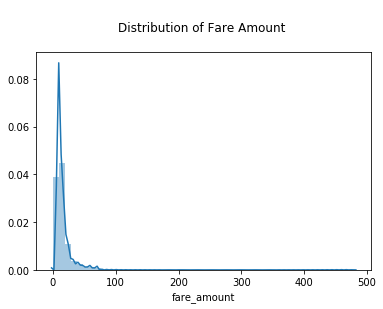

In [31]:
print("Statistics related to Fare Amount:\n\n",taxi.fare_amount.describe())
sns.distplot(taxi['fare_amount'], hist =True).set_title('\nDistribution of Fare Amount \n')

Fare amount has skewness towards right. Majority of the values fall between 0 to 80.

C:\Users\SYS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Distribution of Fare Amount \n')

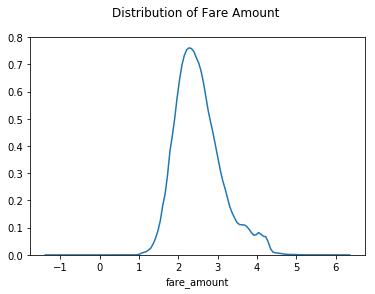

In [32]:
#Validating if the distribution is normal with logs.
sns.distplot(np.log(taxi['fare_amount']), hist =False).set_title('Distribution of Fare Amount \n')

In [34]:
taxi.columns

Index(['TID', 'vendor_id', 'new_user', 'tolls_amount', 'tip_amount', 'mta_tax',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'surcharge', 'fare_amount', 'pickup_day', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month', 'pickup_year', 'travel_time',
       'total_time', 'distance'],
      dtype='object')

In [33]:
# Corelation
cor =taxi.corr()
round(cor,3)

,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,surcharge,fare_amount,pickup_day,pickup_hour,pickup_month,pickup_year,total_time,distance
tolls_amount,1.000,0.404,-0.317,0.009,0.011,-0.008,0.015,-0.014,-0.072,0.662,0.000,-0.003,0.009,-0.009,0.161,0.018
tip_amount,0.404,1.000,-0.142,-0.001,0.014,-0.014,0.013,-0.013,-0.016,0.677,0.010,0.006,0.005,0.016,0.167,0.020
mta_tax,-0.317,-0.142,1.000,0.009,-0.032,0.032,-0.055,0.058,0.039,-0.287,0.004,0.008,-0.001,-0.003,-0.024,-0.064
passenger_count,0.009,-0.001,0.009,1.000,-0.008,0.008,-0.004,0.004,0.007,0.011,0.050,0.013,0.022,-0.010,0.014,-0.008
pickup_longitude,0.011,0.014,-0.032,-0.008,1.000,-1.000,-0.001,0.002,-0.006,0.023,0.008,-0.001,0.005,0.009,0.001,0.709
pickup_latitude,-0.008,-0.014,0.032,0.008,-1.000,1.000,0.001,-0.001,0.005,-0.022,-0.008,0.002,-0.005,-0.009,-0.001,-0.709
dropoff_longitude,0.015,0.013,-0.055,-0.004,-0.001,0.001,1.000,-1.000,-0.010,0.040,0.002,-0.002,0.003,-0.006,-0.014,0.704
dropoff_latitude,-0.014,-0.013,0.058,0.004,0.002,-0.001,-1.000,1.000,0.010,-0.040,-0.001,0.001,-0.003,0.007,0.013,-0.704
surcharge,-0.072,-0.016,0.039,0.007,-0.006,0.005,-0.010,0.010,1.000,-0.040,0.010,0.315,0.002,-0.007,-0.021,-0.011
fare_amount,0.662,0.677,-0.287,0.011,0.023,-0.022,0.040,-0.040,-0.040,1.000,0.008,-0.003,0.025,-0.008,0.308,0.045


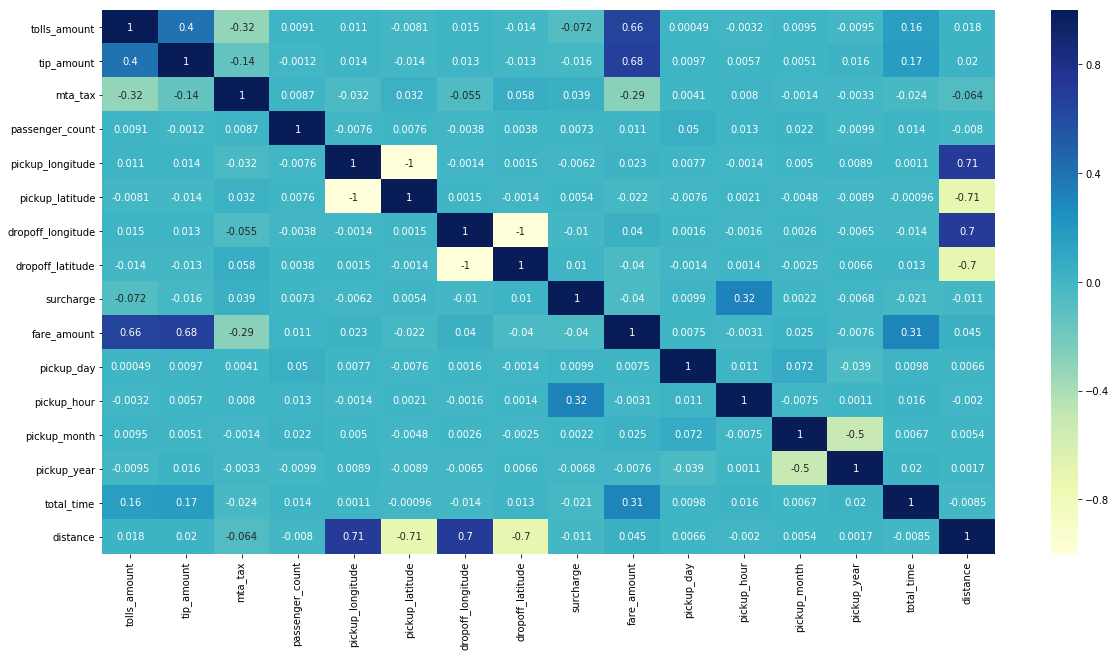

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Distance travelled by the taxi vs Fare Amount \n')

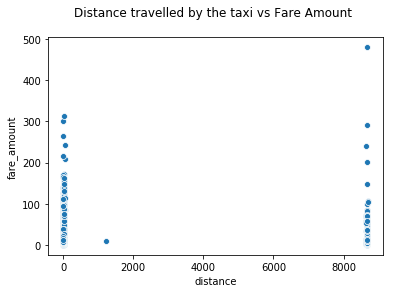

In [35]:
#Analysing Distance traveled wrt Time 
sns.scatterplot(y=taxi['fare_amount'], x=taxi['distance']).set_title("Distance travelled by the taxi vs Fare Amount \n")


We notice very large variance in the data. Either the data falls in the range which is close to 200 or the range which is higher than 8000.

In [36]:
#Understanding the spread of Distance data
dist_less_200 = len(taxi[taxi.distance < 200])
dist_above_200 = len(taxi[taxi.distance > 200])
p_dist_less_200 = (dist_less_200/len(taxi))*100
p_dist_above_200 = (dist_above_200/len(taxi))*100

print("Count of data below 200kms is {}, which is {} % of total data".format(dist_less_200,round(p_dist_less_200,3)) )
print("Count of data above 200kms is {}, which is {} % of total data".format(dist_above_200,round(p_dist_above_200,3)) )


Count of data below 200kms is 80761, which is 99.643 % of total data
Count of data above 200kms is 289, which is 0.357 % of total data



As we have only 0.35% of data which is above 200 kms, it should be ok to drop them from training set.

In [37]:
#Storing data of taxis which had travelled more than 200 kms.
taxi_200_dist = taxi[taxi.distance>200 ]
taxi_200_dist.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,...,surcharge,fare_amount,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,travel_time,total_time,distance
345,AIX000757630,DST000532,NO,0.00,0.0,0.5,2015-03-06 17:34:00,2015-03-06 17:34:00,1,-73.980427,...,1.0,4.00,6,17,Friday,3,2015,00:00:00,0,8668.944190
356,AIX0001109906,DST000532,NO,0.00,0.0,0.5,2015-08-03 16:58:00,2015-08-03 17:04:00,1,0.000000,...,0.0,6.50,3,16,Monday,8,2015,00:06:00,6,8668.676638
412,AIX000989324,DST000401,NO,0.00,NaN,0.5,2015-07-14 17:37:41,2015-07-14 17:52:08,1,0.000000,...,1.0,11.50,14,17,Tuesday,7,2015,00:14:27,14,8669.123050
427,AIX000952663,DST000401,NO,0.00,1.0,0.5,2015-07-28 19:40:28,2015-07-28 19:49:39,3,0.000000,...,1.0,11.00,28,19,Tuesday,7,2015,00:09:11,9,8667.903687
552,AIX0001222795,DST000401,NO,5.33,0.0,0.5,2015-10-17 08:59:55,2015-10-17 08:59:55,1,-73.948484,...,0.0,57.83,17,8,Saturday,10,2015,00:00:00,0,8666.362709


In [38]:
# Dropping rows which have distance more than 200kms.
taxi = taxi.drop(index= list(taxi_200_dist.index.values), axis = 0)

taxi.shape

(80761, 26)

Text(0.5, 1.0, 'Distance travelled by the taxi vs Fare Amount \n')

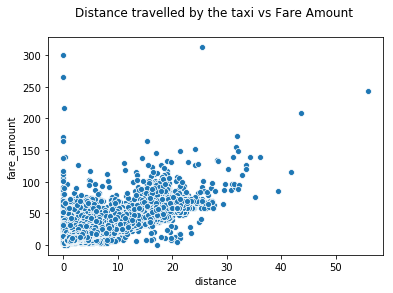

In [39]:
#Again analysing Distance travelled wrt Time
sns.scatterplot(y=taxi['fare_amount'], x=taxi['distance']).set_title("Distance travelled by the taxi vs Fare Amount \n")


Now we notice some positive corelation between distace and fare amount. As the distance increases, there is some increase in fare_amount.

Text(0.5, 1.0, 'Distance travelled by the taxi vs Fare Amount on the basis of passengers \n')

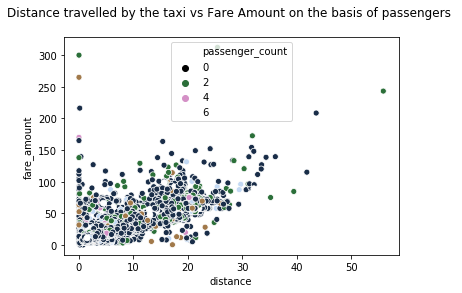

In [40]:
#Distance travelled by the taxi vs Fare Amount on the basis of passengers 
sns.scatterplot(y=taxi['fare_amount'], x=taxi['distance'],
                hue=taxi['passenger_count'], palette='cubehelix').set_title("Distance travelled by the taxi vs Fare Amount on the basis of passengers \n")

We do not notice any pattern from the above dataset.

Text(0.5, 1.0, 'Time travelled by the taxi vs Fare Amount \n')

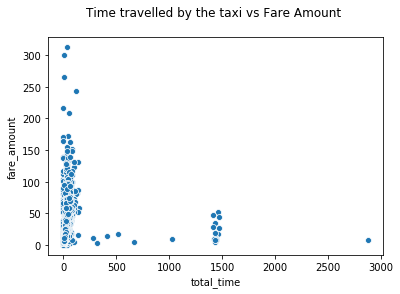

In [41]:
#Analysing total time travelled wrt fare_amount

sns.scatterplot(x='total_time', y='fare_amount', data = taxi).set_title("Time travelled by the taxi vs Fare Amount \n")



Large variance observed, there's a chunk of data which is located below 500 minutes.

In [42]:
#Understanding the spread of Distance data
time_less_100 = len(taxi[taxi.total_time < 100])
time_above_100 = len(taxi[taxi.total_time > 100])
p_time_less_100 = (time_less_100/len(taxi))*100
p_time_above_100 = (time_above_100/len(taxi))*100

print("Count of data below 100mins is {}, which is {} % of total data".format(time_less_100,round(p_time_less_100,3)) )
print("Count of data above 100mins is {}, which is {} % of total data".format(time_above_100,round(p_time_above_100,3)) )


Count of data below 100mins is 80719, which is 99.948 % of total data
Count of data above 100mins is 40, which is 0.05 % of total data


As we have only 0.05% of taxis which had travelled for more than 100 mins, it should be ok to drop them from training set.

In [43]:
#Creating a dataframe to store data of taxis which had travelled for mor ethan 100 mins
taxi_time_abv_100 = taxi[taxi.total_time > 100]

In [44]:
# Dropping rows which had travelled for mor ethan 100 mins
taxi = taxi.drop(index= list(taxi_time_abv_100.index.values), axis = 0)

taxi.shape

(80721, 26)

Text(0.5, 1.0, 'Time travelled by the taxi vs Fare Amount \n')

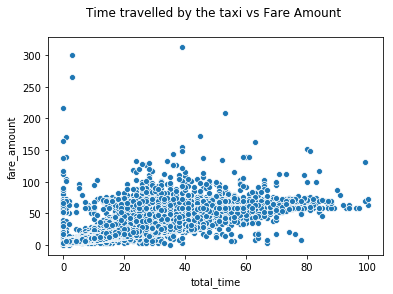

In [45]:
#Reanalysing total time travelled wrt fare_amount

sns.scatterplot(x='total_time', y='fare_amount', data = taxi).set_title("Time travelled by the taxi vs Fare Amount \n")


Now we notice some positive relation btwn time and fare_amount.

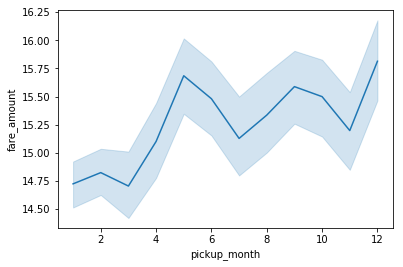

In [46]:
#Analysing if there is any trend between travel month and fare amount
sns.lineplot(x='pickup_month', y='fare_amount', data = taxi)


As the fares vary from 14.75 and 15.75, there is not much variation in the data. Hence it would be ok to drop this column for model building.

In [49]:
#Adding this column to drop_col
drop_col.append('pickup_month')
drop_col

['store_and_fwd_flag',
 'TID',
 'pickup_date',
 'pickup_datetime',
 'dropoff_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_month']

Text(0.5, 1.0, 'Average Fare amount collected in every day of week \n \n')

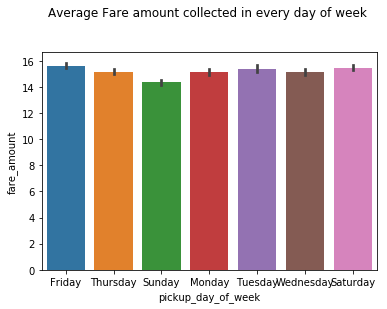

In [47]:
#Fare amount vs day of the week
sns.barplot(x=taxi.pickup_day_of_week, 
            y = taxi.fare_amount).set_title('Average Fare amount collected in every day of week \n \n')

As there is not much variance in average fares collected everyday, 'day' column can be dropped.

In [48]:
drop_col.append('pickup_day_of_week')
drop_col

['store_and_fwd_flag',
 'TID',
 'pickup_date',
 'pickup_datetime',
 'dropoff_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_day_of_week']

Text(0.5, 1.0, 'Average Fare amount collected in every hour of a day \n \n')

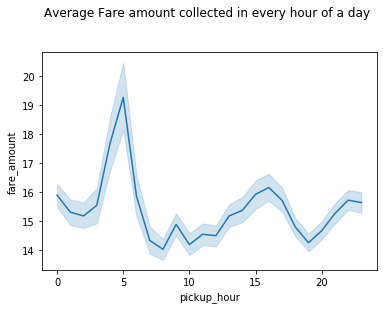

In [52]:
#Analysing average fare_amount collected in each hour of the day
sns.lineplot(x=taxi.pickup_hour, 
            y = taxi.fare_amount).set_title('Average Fare amount collected in every hour of a day \n \n')

It is observed that there is lot of variation in the data, and on an average more fares are collected from 2 AM to 6 AM. Also there's some peak noticed between 3PM and 5PM, which could be due to peak traffic hours.

Text(0.5, 1.0, 'Average fare amount vs the count of passengers in a taxi')

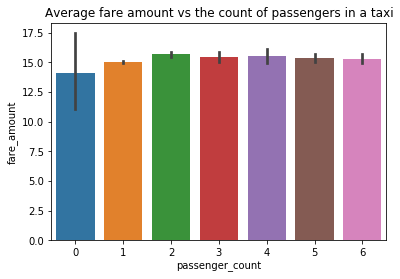

In [49]:
#Fare Amount vs Passenger Count
sns.barplot(x=taxi.passenger_count, y=taxi.fare_amount).set_title('Average fare amount vs the count of passengers in a taxi')

Not much variation, hence dropping the column.

In [50]:
drop_col.append('passenger_count')
drop_col

['store_and_fwd_flag',
 'TID',
 'pickup_date',
 'pickup_datetime',
 'dropoff_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_day_of_week',
 'passenger_count']

Text(0.5, 1.0, 'Relation of fare amount vs MTA Tax\n')

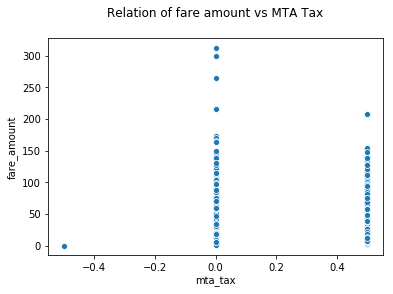

In [51]:
#Fare amount vs MTA Tax

sns.scatterplot(x=taxi.mta_tax, y=taxi.fare_amount).set_title('Relation of fare amount vs MTA Tax\n')


Not much variation noticed, hence dropping the column.

Text(0.5, 1.0, 'Relation of fare amount vs Toll Amount\n')

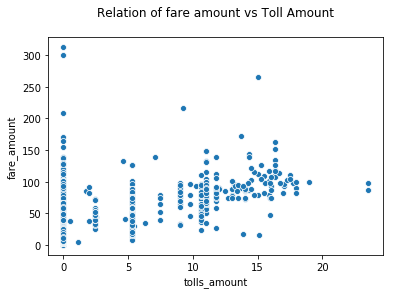

In [52]:
#Fare amount vs Toll Amount
sns.scatterplot(x=taxi.tolls_amount, y=taxi.fare_amount).set_title('Relation of fare amount vs Toll Amount\n')


Not much variation noticed, hence dropping the column.

Text(0.5, 1.0, 'Distribution of average fare collected vendor wise\n')

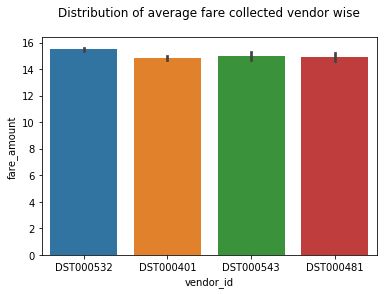

In [53]:
#Fare amount vs Vendor
sns.barplot(x=taxi.vendor_id, y=taxi.fare_amount).set_title('Distribution of average fare collected vendor wise\n')


Not much variation noticed, hence dropping the column.

Text(0.5, 1.0, 'Surcharge vs Fare Amount')

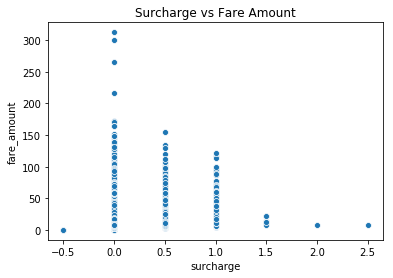

In [54]:
#Fare_Amount vs Surcharge
sns.scatterplot(x=taxi.surcharge, y=taxi.fare_amount).set_title("Surcharge vs Fare Amount")

Not much variation noticed, hence dropping the column.

Text(0.5, 1.0, 'Spread of Average Fare Amount by Payment Type')

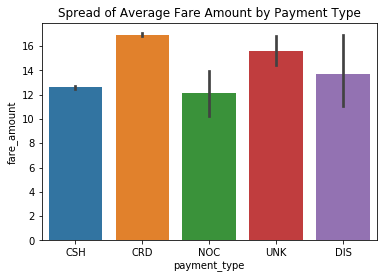

In [55]:
#Fare_amount vs Payment_type
sns.barplot(x=taxi.payment_type, y=taxi.fare_amount).set_title("Spread of Average Fare Amount by Payment Type")

Not much variation noticed, hence dropping the column.

Text(0.5, 1.0, 'Average surcharge collected by user type')

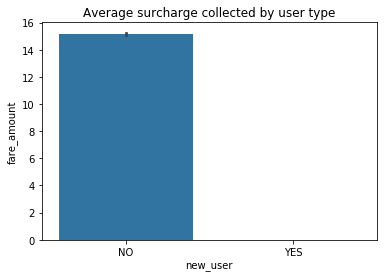

In [57]:
#Fare vs User Type
sns.barplot(x=taxi.new_user, y=taxi.fare_amount).set_title("Average surcharge collected by user type")

Not much variation noticed, hence dropping the column.

In [58]:
#Appending columns to be dropped
d = ['mta_tax','tolls_amount','vendor_id','new_user','payment_type', 'surcharge','pickup_year',
       'travel_time',]
drop_col.extend(d)
drop_col

['store_and_fwd_flag',
 'TID',
 'pickup_date',
 'pickup_datetime',
 'dropoff_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_day_of_week',
 'passenger_count',
 'mta_tax',
 'tolls_amount',
 'vendor_id',
 'new_user',
 'payment_type',
 'surcharge',
 'pickup_year',
 'travel_time']

Text(0.5, 1.0, 'Relation of tip amount with fare amount')

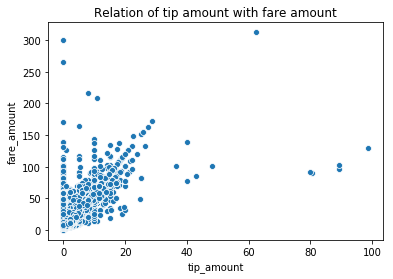

In [59]:
#Fare Amount vs Tip AMount
sns.scatterplot(x=taxi.tip_amount, y=taxi.fare_amount).set_title("Relation of tip amount with fare amount")

Positive corelation noticed.

Text(0.5, 1.0, 'Distribution of average fare amount as per rate_code')

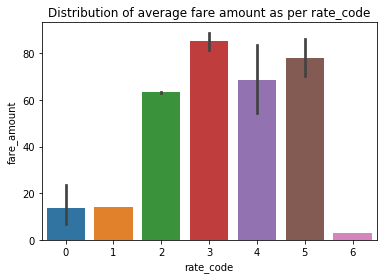

In [60]:
#Fare Amount vs Rate Card
sns.barplot(x=taxi.rate_code, y=taxi.fare_amount).set_title("Distribution of average fare amount as per rate_code")

As there is some variation in the data, we would keep it for the model building.

In [61]:
taxi.shape

(80721, 26)

Text(0.5, 1.0, 'Count of Rides taken by each Vendor\n')

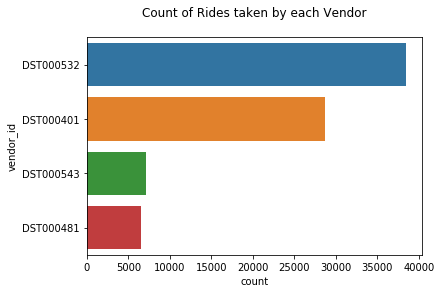

In [62]:
#Count Plot accross a categorical variable
#plt.figure(figsize=(10,8))
sns.countplot(y='vendor_id', data=taxi)
plt.title("Count of Rides taken by each Vendor\n")
#plt.ylabel('Vendor ID')
#plt.xlabel('Count of Rides taken')

### New shape of the dataframe

In [71]:
taxi.shape

(80721, 8)

In [72]:
taxi.columns

Index(['tip_amount', 'rate_code', 'fare_amount', 'pickup_day', 'pickup_hour',
       'pickup_month', 'total_time', 'distance'],
      dtype='object')

In [73]:
taxi.head()

,tip_amount,rate_code,fare_amount,pickup_day,pickup_hour,pickup_month,total_time,distance
0,NaN,1,38.33,26,21,6,26,10.094184
1,1.9,1,11.90,9,13,4,12,1.777206
2,3.0,1,18.00,13,14,9,18,5.234128
3,NaN,1,5.00,27,8,7,4,0.388867
4,0.0,1,13.50,26,23,4,13,3.844531


In [74]:
taxi.isnull().sum()

tip_amount      8060
rate_code          0
fare_amount        0
pickup_day         0
pickup_hour        0
pickup_month       0
total_time         0
distance           0
dtype: int64

### Imputing values in Tip_Amount

In [75]:
imp_num_data = taxi.tip_amount
imp_num_data.head()

0    NaN
1    1.9
2    3.0
3    NaN
4    0.0
Name: tip_amount, dtype: float64

In [73]:
# Numeric columns imputation
#imp_num = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#imp_num.fit(imp_num_data)
#imp_num_data = pd.DataFrame(imp_num.transform(imp_num_data),columns=imp_num_data.tip_amount)

In [76]:
taxi['tip_amount'] = taxi['tip_amount'].replace(np.NaN,0)

In [77]:
taxi.isnull().sum()

tip_amount      0
rate_code       0
fare_amount     0
pickup_day      0
pickup_hour     0
pickup_month    0
total_time      0
distance        0
dtype: int64

### Categorizing numeric and categorical variables

In [78]:
num_cols=['tip_amount','fare_amount','distance','pickup_hour','total_time']
cat_cols=['rate_code']

### Dummfying categorical column

In [79]:
taxi_data=pd.get_dummies(taxi,columns= cat_cols,drop_first=True)
taxi_data.columns

taxi_data.info()
taxi_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80721 entries, 0 to 87957
Data columns (total 13 columns):
tip_amount      80721 non-null float64
fare_amount     80721 non-null float64
pickup_day      80721 non-null int64
pickup_hour     80721 non-null int64
pickup_month    80721 non-null int64
total_time      80721 non-null int32
distance        80721 non-null float64
rate_code_1     80721 non-null uint8
rate_code_2     80721 non-null uint8
rate_code_3     80721 non-null uint8
rate_code_4     80721 non-null uint8
rate_code_5     80721 non-null uint8
rate_code_6     80721 non-null uint8
dtypes: float64(3), int32(1), int64(3), uint8(6)
memory usage: 7.6 MB


,tip_amount,fare_amount,pickup_day,pickup_hour,pickup_month,total_time,distance,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6
0,0.0,38.33,26,21,6,26,10.094184,1,0,0,0,0,0
1,1.9,11.90,9,13,4,12,1.777206,1,0,0,0,0,0
2,3.0,18.00,13,14,9,18,5.234128,1,0,0,0,0,0
3,0.0,5.00,27,8,7,4,0.388867,1,0,0,0,0,0
4,0.0,13.50,26,23,4,13,3.844531,1,0,0,0,0,0


## Splitting train data into train and validation

In [80]:
## TEST TRAIN SPLIT

X = taxi_data.drop(columns=['fare_amount'],axis=1)
y = taxi_data['fare_amount']

from sklearn.model_selection import train_test_split
trainx,valx,trainy,valy = train_test_split(X, y ,test_size=0.3,random_state=123)

print(trainx.shape,valx.shape,trainy.shape,valy.shape)

(56504, 12) (24217, 12) (56504,) (24217,)


In [81]:
trainx.head()

,tip_amount,pickup_day,pickup_hour,pickup_month,total_time,distance,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6
75971,0.0,25,17,1,8,1.337170,1,0,0,0,0,0
80224,0.0,2,23,10,9,2.589304,1,0,0,0,0,0
21752,1.0,26,21,8,6,1.803466,1,0,0,0,0,0
36851,1.5,23,15,7,8,3.172479,1,0,0,0,0,0
48071,0.0,1,21,1,2,1.404758,1,0,0,0,0,0


In [83]:
trainy.head()

75971     7.0
80224    10.5
21752     8.5
36851    11.0
48071     5.8
Name: fare_amount, dtype: float64

## Standardising the data

In [84]:
#Standardizing Train Data
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(trainx.iloc[:,:5])

trainx.iloc[:,:5] = scaler.transform(trainx.iloc[:,:5])

C:\Users\SYS\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [85]:
trainx.head()

,tip_amount,pickup_day,pickup_hour,pickup_month,total_time,distance,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6
75971,-0.605799,1.013252,0.528661,-1.239825,-0.501309,1.337170,1,0,0,0,0,0
80224,-0.605799,-1.638915,1.451504,1.215989,-0.400847,2.589304,1,0,0,0,0,0
21752,-0.165089,1.128563,1.143890,0.670252,-0.702234,1.803466,1,0,0,0,0,0
36851,0.055266,0.782629,0.221047,0.397384,-0.501309,3.172479,1,0,0,0,0,0
48071,-0.605799,-1.754226,1.143890,-1.239825,-1.104083,1.404758,1,0,0,0,0,0


In [86]:
## Scale the numeric attributes of Validation Dataset
scaler = StandardScaler()
scaler.fit(valx.iloc[:,:5])

valx.iloc[:,:5] = scaler.transform(valx.iloc[:,:5])

valx.head()

C:\Users\SYS\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,tip_amount,pickup_day,pickup_hour,pickup_month,total_time,distance,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6
37099,-0.172355,-0.709135,-0.541880,-0.691644,-0.607354,1.580981,1,0,0,0,0,0
50563,-0.633884,1.017929,1.146422,0.677432,-0.504517,2.036001,1,0,0,0,0,0
9391,0.464554,-0.824273,-0.541880,1.498878,-0.093171,1.906382,1,0,0,0,0,0
82762,-0.633884,1.248204,0.992940,-1.239275,1.449375,8.437940,1,0,0,0,0,0
33184,-0.172355,-0.478860,0.992940,-0.417829,-0.093171,2.911380,1,0,0,0,0,0


### Building first linear model - All Variables {lm1}

In [87]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# fit the model to the training data
lm.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
#Print coefficients and intercept
print("\nIntercept : ",lm.intercept_)

print("Coefficients :")
coeff_df = pd.DataFrame(lm.coef_,trainx.columns,columns=['Coefficient'])
coeff_df


Intercept :  13.264144210856797
Coefficients :


,Coefficient
tip_amount,2.732869
pickup_day,-0.018182
pickup_hour,0.066622
total_time,4.121127
distance,5.776169
rate_code_1,1.654622
rate_code_2,7.747799
rate_code_3,35.912366
rate_code_4,22.133220
rate_code_5,50.592961


From the above, we can build our eq.

y = 13.26 + 2.73(tip_amount)-0.018182(pickup_day) + 0.067(pickup_hour)+......+ 1.97(rate_code_6)

Here 2.73 coefficient of tip_amount means that a unit increase in tip_amount will increase y by 2.73 units.

#### Making Predictions:

In [86]:
y_pred = lm.predict(valx)

In [87]:
type(y_pred)

numpy.ndarray

#### Computing RMSE and R^2 Values

Text(0, 0.5, 'Fare Amount')

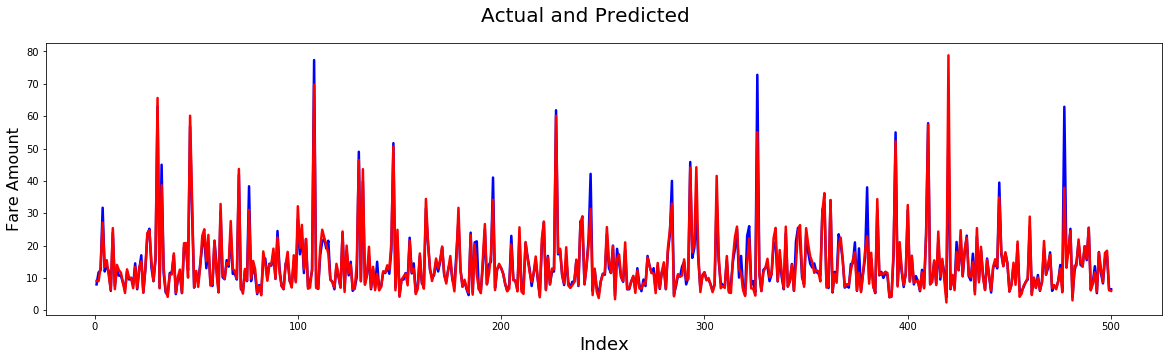

In [88]:
# Actual vs Predicted values for first 500 rows
import matplotlib.pyplot as plt
c = [i for i in range(1,501,1)]         # generating index 
fig = plt.figure(figsize=(20,5))
plt.plot(c,valy.iloc[:500,], color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred[:500,], color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Fare Amount', fontsize=16)                       # Y-label

Text(0, 0.5, 'y_val - y_pred')

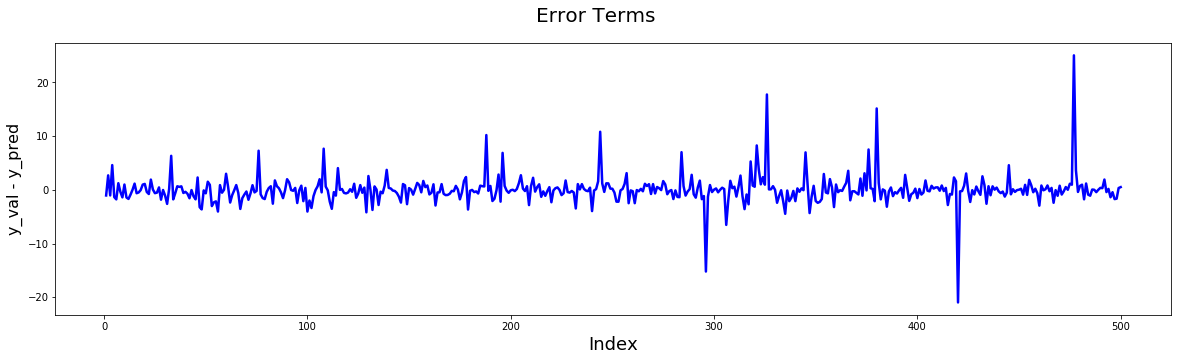

In [89]:
# Error terms
c = [i for i in range(1,501,1)]
fig = plt.figure(figsize=(20,5))
plt.plot(c,(valy[:500,]-y_pred[:500,]), color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_val - y_pred', fontsize=16)                # Y-label

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(valy, y_pred)
r_squared = r2_score(valy, y_pred)

In [110]:

print('Root Mean_Squared_Error :' ,np.sqrt(mse))
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Root Mean_Squared_Error : 3.186197837778277
Mean_Squared_Error : 10.151856661462968
r_square_value : 0.9301410493308033


With this model, we have received a very good R^2 value, however MSE is not that good.

Text(0, 0.5, 'Predicted Y')

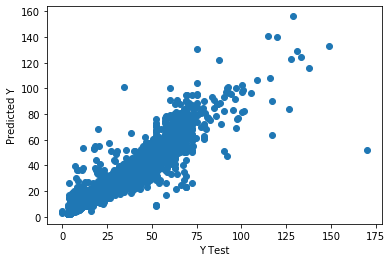

In [92]:
import matplotlib.pyplot as plt
plt.scatter(valy,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Checking for P-value Using STATSMODEL

In [93]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(trainx)
# create a fitted model in one line
lm_1 = sm.OLS(trainy,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 5.453e+04
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:38:43   Log-Likelihood:            -1.5337e+05
No. Observations:               56504   AIC:                         3.068e+05
Df Residuals:                   56492   BIC:                         3.069e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.2641      3.653      3.631      

/Users/icg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### From above analysis we notice :
    1. Pick up day, rate_code_1 and rate_code_6 have P values above 0.05.
    2. As values are above 0.05, those variables are not significant and hence can be dropped from the model.
   

## Building second Linear Model {lm2}

In [94]:
# Putting feature variable to Train X
train_x2 = trainx[['tip_amount','pickup_hour','total_time',
             'distance','rate_code_2','rate_code_3','rate_code_4','rate_code_5']]
train_x2.head()

,tip_amount,pickup_hour,total_time,distance,rate_code_2,rate_code_3,rate_code_4,rate_code_5
75971,-0.605799,0.528661,-0.501309,-0.553314,0,0,0,0
80224,-0.605799,1.451504,-0.400847,-0.216099,0,0,0,0
21752,-0.165089,1.143890,-0.702234,-0.427735,0,0,0,0
36851,0.055266,0.221047,-0.501309,-0.059044,0,0,0,0
48071,-0.605799,1.143890,-1.104083,-0.535111,0,0,0,0


In [95]:
# Putting feature variable to Val X
val_x2 = valx[['tip_amount','pickup_hour','total_time',
             'distance','rate_code_2','rate_code_3','rate_code_4','rate_code_5']]
val_x2.head()

,tip_amount,pickup_hour,total_time,distance,rate_code_2,rate_code_3,rate_code_4,rate_code_5
37099,-0.172355,-0.541880,-0.607354,-0.496044,0,0,0,0
50563,-0.633884,1.146422,-0.504517,-0.372359,0,0,0,0
9391,0.464554,-0.541880,-0.093171,-0.407593,0,0,0,0
82762,-0.633884,0.992940,1.449375,1.367823,0,0,0,0
33184,-0.172355,0.992940,-0.093171,-0.134413,0,0,0,0


In [96]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X2 = sm.add_constant(train_x2)
# create a fitted model in one line
lm_2 = sm.OLS(trainy,X2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 7.498e+04
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:38:44   Log-Likelihood:            -1.5337e+05
No. Observations:               56504   AIC:                         3.068e+05
Df Residuals:                   56495   BIC:                         3.068e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.9187      0.016    954.075      

In [97]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm2 = LinearRegression()

# fit the model to the training data
lm2.fit(train_x2,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
y_pred2 = lm2.predict(val_x2)

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
mse_2 = mean_squared_error(valy, y_pred2)
r_squared_2 = r2_score(valy, y_pred2)



print('Root Mean_Squared_Error :' ,np.sqrt(mse_2))
print('Mean_Squared_Error :' ,mse_2)
print('r_square_value :',r_squared_2)

Root Mean_Squared_Error : 3.185881918465637
Mean_Squared_Error : 10.149843598406289
r_square_value : 0.9301549020158303


MSE has decreased with only few decimals.

## Building 3rd model

In [100]:
# Putting feature variable to Train X
train_x3 = trainx[['tip_amount','total_time','distance','rate_code_2']]
# Putting feature variable to Val X
val_x3 = valx[['tip_amount','total_time','distance','rate_code_2']]

In [101]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X3 = sm.add_constant(train_x3)
# create a fitted model in one line
lm_3 = sm.OLS(trainy,X3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 9.816e+04
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:38:44   Log-Likelihood:            -1.6409e+05
No. Observations:               56504   AIC:                         3.282e+05
Df Residuals:                   56499   BIC:                         3.282e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.1181      0.019    802.689      

/Users/icg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [102]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm3 = LinearRegression()

# fit the model to the training data
lm3.fit(train_x3,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_pred3 = lm3.predict(val_x3)
val_x3.shape
valy.shape

(24217,)

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
mse_3 = mean_squared_error(valy, y_pred3)
r_squared_3 = r2_score(valy, y_pred3)

print('Root Mean_Squared_Error :' ,np.sqrt(mse_3))
print('Mean_Squared_Error :' ,mse_3)
print('r_square_value :',r_squared_3)

Root Mean_Squared_Error : 3.9512644466399856
Mean_Squared_Error : 15.612490727281191
r_square_value : 0.8925642613059459


## Building 4th model

In [105]:
# Putting feature variable to Train X
train_x4 = trainx[['distance','rate_code_2','rate_code_3','rate_code_4','rate_code_5']]
# Putting feature variable to Val X
val_x4 = valx[['distance','rate_code_2','rate_code_3','rate_code_4','rate_code_5']]

In [106]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X4 = sm.add_constant(train_x4)
# create a fitted model in one line
lm_4 = sm.OLS(trainy,X4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 5.059e+04
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:38:44   Log-Likelihood:            -1.7462e+05
No. Observations:               56504   AIC:                         3.492e+05
Df Residuals:                   56498   BIC:                         3.493e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.9497      0.023    656.620      

/Users/icg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [107]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm4 = LinearRegression()

# fit the model to the training data
lm4.fit(train_x4,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
y_pred4 = lm4.predict(val_x4)


In [112]:
from sklearn.metrics import mean_squared_error, r2_score
mse_4 = mean_squared_error(valy, y_pred4)
r_squared_4 = r2_score(valy, y_pred4)

print('Root Mean_Squared_Error :' ,np.sqrt(mse_4))
print('Mean_Squared_Error :' ,mse_4)
print('r_square_value :',r_squared_4)

Root Mean_Squared_Error : 5.001914299591914
Mean_Squared_Error : 25.01914666046207
r_square_value : 0.8278333323033007


### Uptil now only the second model has shown least MSE value.

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(trainx, trainy)
rf_predict = rf.predict(valx)
print(rf_predict)

[ 8.83    8.8    12.4755 ...  7.71   15.409  20.21  ]


In [92]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(valy, rf_predict))
print('Mean Squared Error:', metrics.mean_squared_error(valy, rf_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valy, rf_predict)))

Mean Absolute Error: 1.1633391006317875
Mean Squared Error: 8.1191782122063
Root Mean Squared Error: 2.849417170616879
